# 입문자의 투박한 EDA
* 기본적인 시각화 방법을 바탕으로 제작한 EDA

#### 내 의견
* 눈으로 보는 것 보다는 비율로 확인하는 것이 좋을 것 같다.
* 눈으로 대략적으로 보는 것이랑 수치로 보는 것은 차이가 있을 것 같기 때문!!!
---

## 1. 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=2)

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
data.shape

(26457, 20)

---
## 2. Null data 체크하기
* **직업 유형**에 있어서 26457개의 데이터 중 8171개의 null값이 있어 상대적으로 null이 많이 포함됨을 알 수 있음
* 직업유형
    * null값 처리 고민해봐야 할 듯!!
    * 백수와 같이 하나의 유형으로 봐야할까?

In [6]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

---
## 3. Credit 비율 살펴보기
* 낮은 신용의 신용카드 사용자가 많은 비율을 차지함
* 신용도가 낮을 수록 높은 신용의 신용카드 사용자

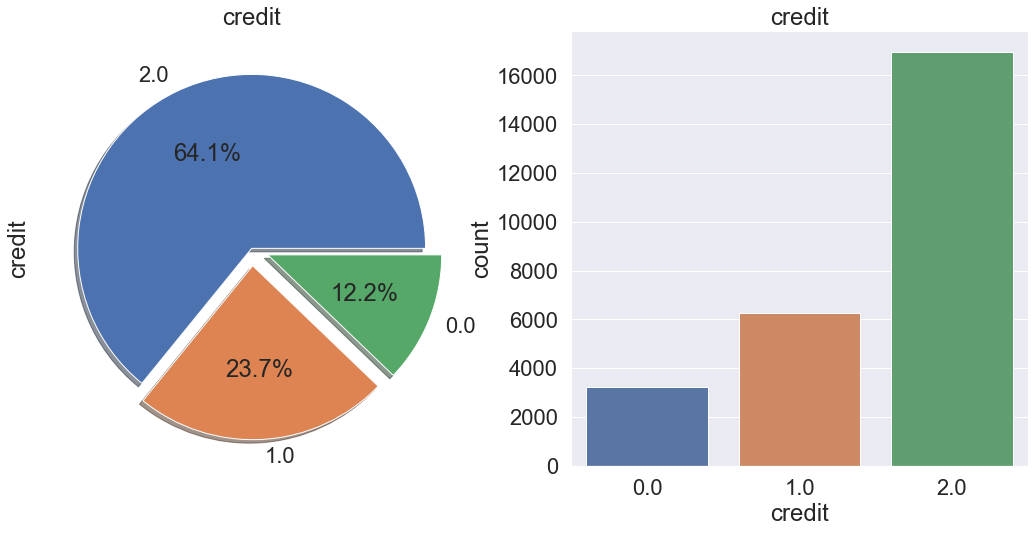

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['credit'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit', data=data, ax=ax[1])
ax[1].set_title('credit')
plt.show()

---
## 4. 데이터 타입 파악하기
> 추후 인코딩을 함에 있어서 문제가 발생하는 것을 방지하기 위해 !

> Label Encoding, One hot Encoding 등 여러 인코딩을 위해 생각해봄..

#### Categorical Features
* 남자를 0, 여자를 1로 표시하였을 떄와 같이 숫자의 순서가 존재하지 않는 변수로..
* Binary
    * gender : 성별
    * car : 차량 소유 여부
    * reality : 부동산 소유 여부
    * FLAG_MOBIL : 핸드폰 소유 여부
    * work_phone : 업무용 전화 소유 여부
    * phone : 전화 소유 여부
    * email : 이메일 소유 여부
* Multi
    * family_size : 가족 규모
    * house_type : 생활 방식
    * occyp_type : 직업 유형
    * income_type : 소득 분류
    * family_type : 결혼 여부

#### Ordinal Features
* 인코딩을 하였을 때 상, 중, 하와 같이 비교가 가능한 변수로..
* 변수
    * edu_type : 교육 수준
    * credit : 신용 기준

---
## 5. 변수별 신용도 EDA

#### Q1. 성별에 따라 신용도가 달라지는가?
결론 : X

In [8]:
# 성별에 따른 데이터 수 확인
data.groupby(['gender'])['credit'].count()

gender
F    17697
M     8760
Name: credit, dtype: int64

In [9]:
# 성별, 신용도별 데이터 수 확인
data.groupby(['gender', 'credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

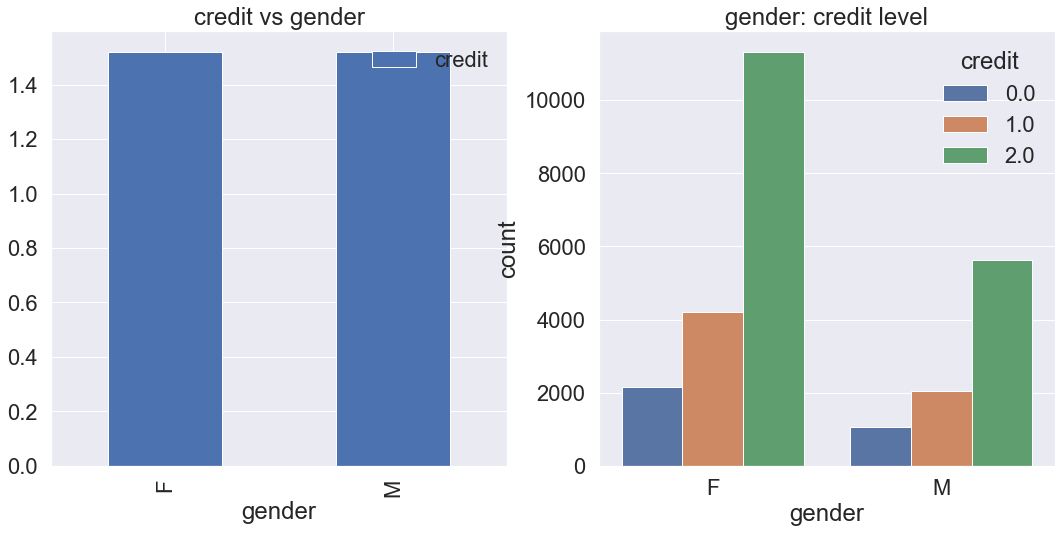

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 남자와 여자의 평균 신용등급
data[['gender', 'credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')

# 남자와 여자 각각의 신용등급별 사람 수
sns.countplot('gender', hue='credit', data=data, ax=ax[1])
ax[1].set_title('gender: credit level')
plt.show()

**위의 '오른쪽' 그래프 설명**
* 신용도 2인 사람의 수가 여성쪽이 상당히 많아서 연체율이 높다는 것처럼 보일 수 있지만, 사실 전체적인 데이터 비율에서는 남성과 여성이 차이가 없음!
* 수집된 여성의 데이터량이 2배 더 많기 때문에 신용도별로 그래프를 그렸을 때 2배 차이나는 걸로 보이는 것임!
* 아래의 표들과 그래프들은 그 증거들!

In [14]:
# 표로 확인하기 1
pd.crosstab(data.credit, data.gender, margins=True).style.background_gradient(cmap='summer_r')

gender,F,M,All
credit,,,
0.0,2148,1074,3222
1.0,4220,2047,6267
2.0,11329,5639,16968
All,17697,8760,26457


In [15]:
# 표로 확인하기 1
pd.crosstab(data.gender, data.credit, margins=True).style.background_gradient(cmap='summer_r')

credit,0.0,1.0,2.0,All
gender,,,,
F,2148,4220,11329,17697
M,1074,2047,5639,8760
All,3222,6267,16968,26457


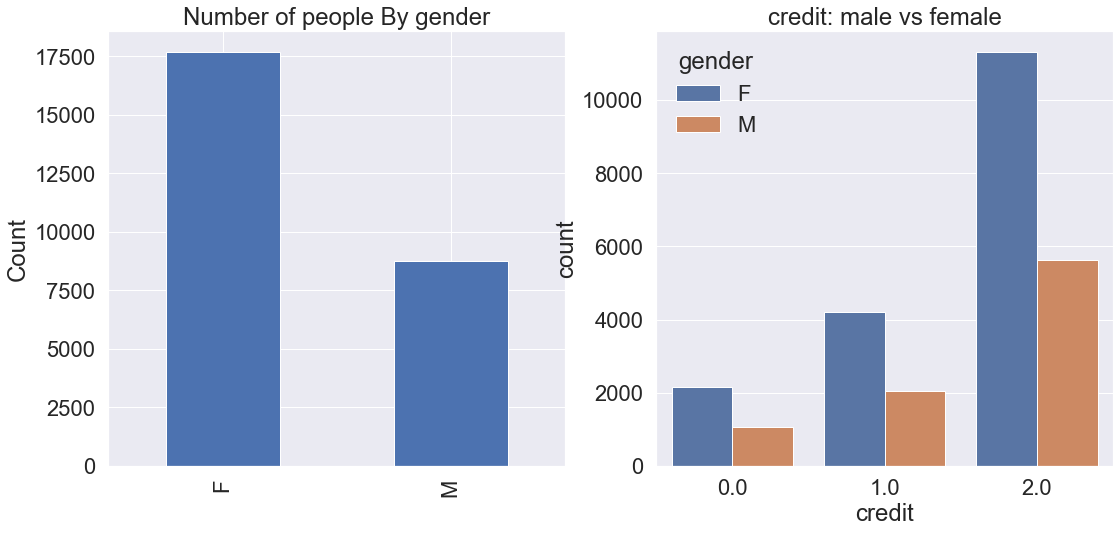

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 남자와 여자 수
data['gender'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By gender')
ax[0].set_ylabel('Count')

# 신용등급별로 여자 남자 수 확인
sns.countplot('credit', hue='gender', data=data, ax=ax[1])
ax[1].set_title('credit: male vs female')
plt.show()

#### Q2. 차량 소유 여부에 따라서 신용 점수가 달라지는가?
결론 : X

In [18]:
# 차량 소유 여부에 따른 데이터 수 확인
data.groupby(['car'])['credit'].count()

car
N    16410
Y    10047
Name: credit, dtype: int64

In [19]:
# 차량 소유 여부, 신용도별 데이터 수 확인
data.groupby(['car', 'credit'])['credit'].count()

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64

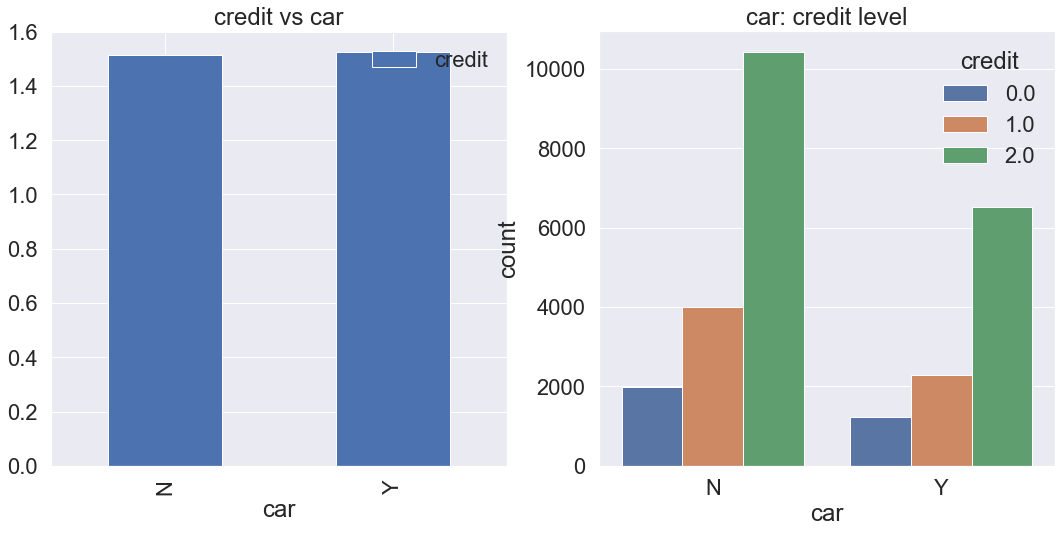

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 차량 소유 여부에 따르평균 신용등급
data[['car', 'credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')

# 차량 소유 여부에 따르 신용등급별 사람 수
sns.countplot('car', hue='credit', data=data, ax=ax[1])
ax[1].set_title('car: credit level')
plt.show()

In [4]:
pd.crosstab(data.credit, data.car, margins=True).style.background_gradient(cmap='summer_r')

car,N,Y,All
credit,,,
0.0,1982,1240,3222
1.0,3990,2277,6267
2.0,10438,6530,16968
All,16410,10047,26457


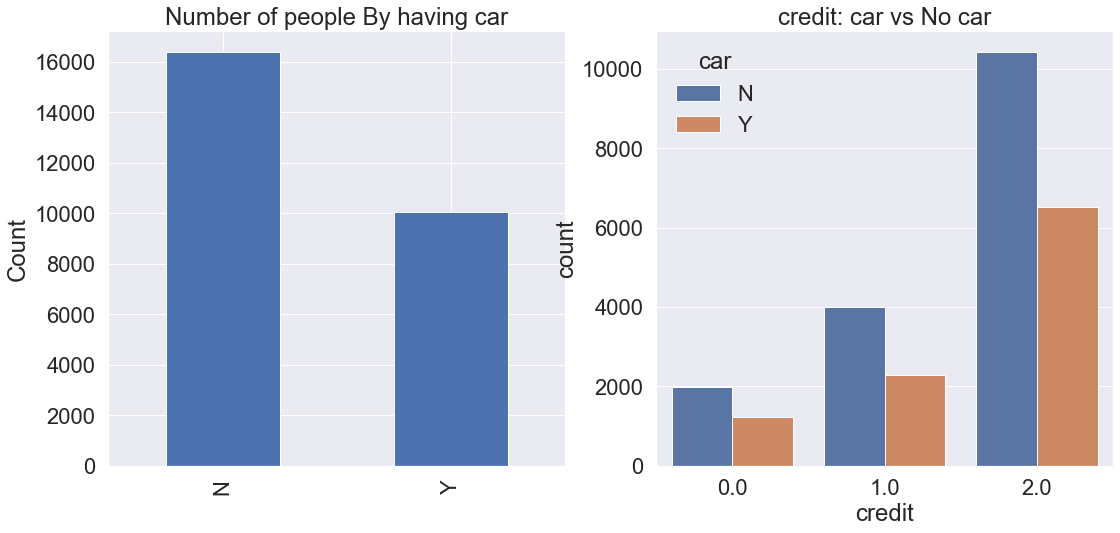

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 차량을 가진 사람과 아닌 사람 수
data['car'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By having car')
ax[0].set_ylabel('Count')

# 신용등급별 차량 보유 여부 사람 수
sns.countplot('credit', hue='car', data=data, ax=ax[1])
ax[1].set_title('credit: car vs No car')
plt.show()

* 차량 여부에 따른 신용도 또한 모든 비율이 비슷한 비율을 보이고 있어서
* 뚜렷하게 구별되는 변수인지는 아직 잘 모르겠음..

---
#### Q3. 부동산 소유 여부에 따라 신용점수가 달라지는가?
결론 : X

In [7]:
data.groupby(['reality'])['credit'].count()

reality
N     8627
Y    17830
Name: credit, dtype: int64

In [8]:
data.groupby(['reality', 'credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

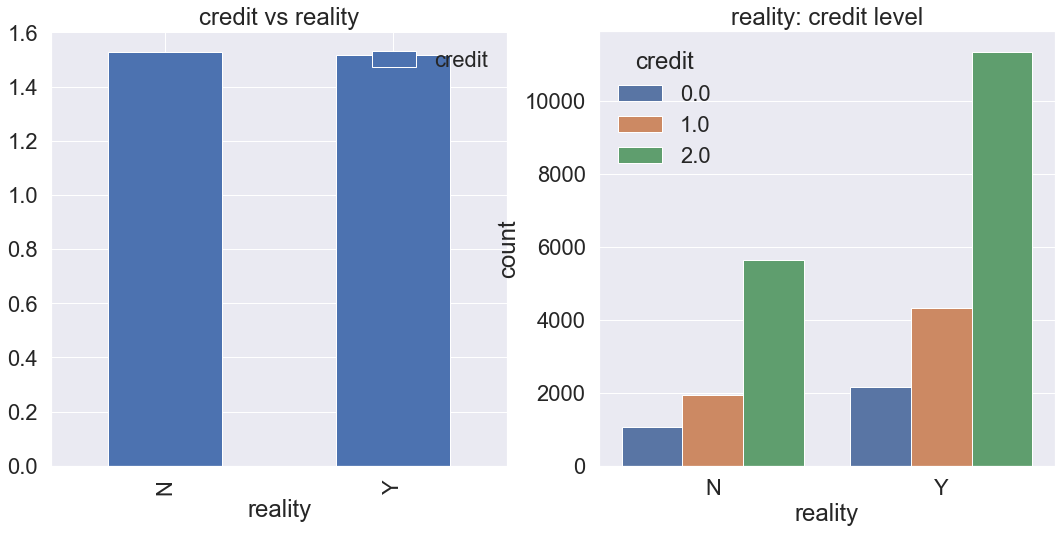

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 부동산 소유 여부에 따른 평균 신용등급
data[['reality', 'credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')

# 부동산 소유 여부에 따르 신용등급별 사람 수
sns.countplot('reality', hue='credit', data=data, ax=ax[1])
ax[1].set_title('reality: credit level')
plt.show()

* 이번에도 큰 차이를 발견하지 못함..
* 다른 방식으로 접근해야 하는 걸까?

In [10]:
pd.crosstab(data.credit, data.reality, margins=True).style.background_gradient(cmap='summer_r')

reality,N,Y,All
credit,,,
0.0,1064,2158,3222
1.0,1935,4332,6267
2.0,5628,11340,16968
All,8627,17830,26457


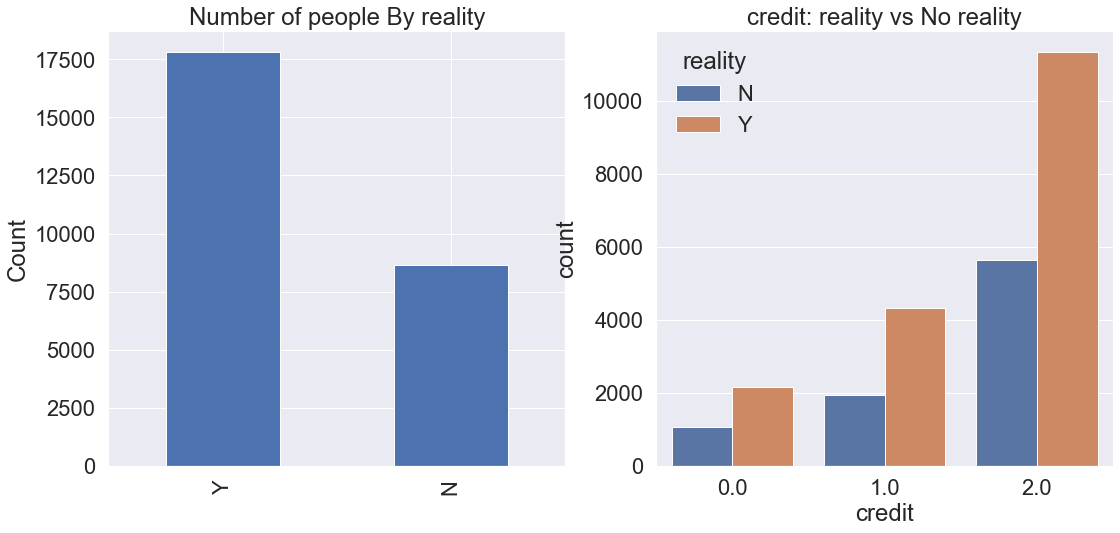

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 부동산 가진 사람과 아닌 사람 수
data['reality'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By reality')
ax[0].set_ylabel('Count')

# 신용등급별 부동산 소유 여부 사람 수
sns.countplot('credit', hue='reality', data=data, ax=ax[1])
ax[1].set_title('credit: reality vs No reality')
plt.show()

---
#### Q4. 가족 구성에 따라 신용 점수가 달라지는가?
결론 : 있을 듯.. 하다가 없네?


In [12]:
data.groupby(['family_type'])['credit'].count()

family_type
Civil marriage           2123
Married                 18196
Separated                1539
Single / not married     3496
Widow                    1103
Name: credit, dtype: int64

In [13]:
data.groupby(['family_type', 'credit'])['credit'].count()

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64

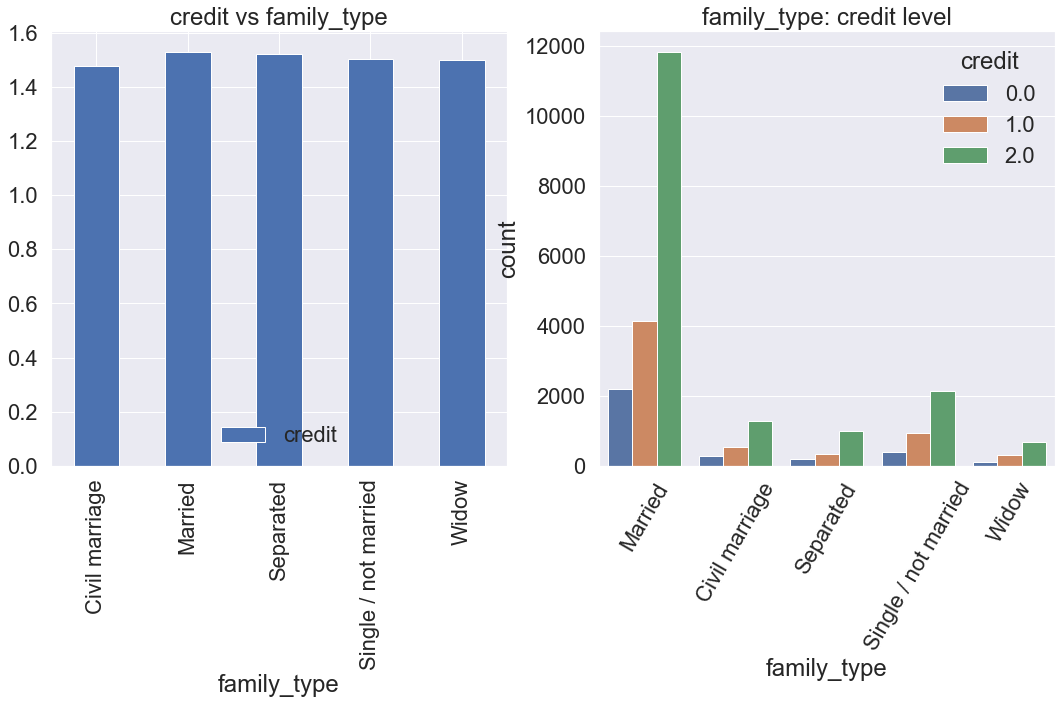

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가족 구성에 따른 평균 신용등급
data[['family_type', 'credit']].groupby(['family_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_type')

# 가족 구성에 따르 신용등급별 사람 수
sns.countplot('family_type', hue='credit', data=data, ax=ax[1])
ax[1].set_title('family_type: credit level')
plt.xticks(rotation=60)

plt.show()

* 가족 구성에 따라서 약간의 차이가 있는 것 같다!

In [19]:
pd.crosstab(data.credit, data.family_type, margins=True).style.background_gradient(cmap='summer_r')

family_type,Civil marriage,Married,Separated,Single / not married,Widow,All
credit,,,,,,
0.0,288,2213,193,402,126,3222
1.0,539,4140,349,940,299,6267
2.0,1296,11843,997,2154,678,16968
All,2123,18196,1539,3496,1103,26457


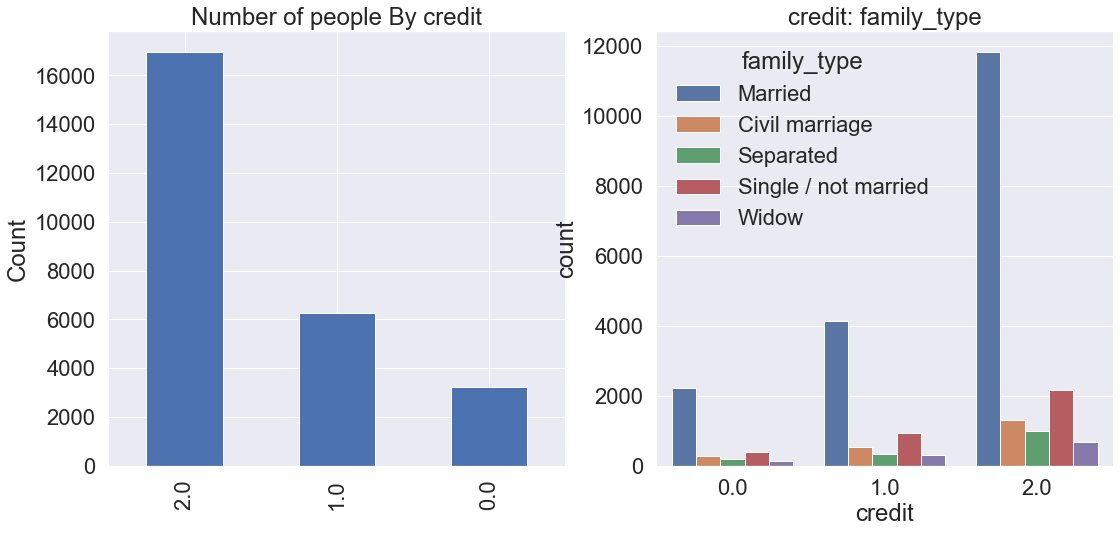

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 신용등급별 사람 수
data['credit'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By credit')
ax[0].set_ylabel('Count')

# 신용등급별 가족 구성원별 사람 수
sns.countplot('credit', hue='family_type', data=data, ax=ax[1])
ax[1].set_title('credit: family_type')
plt.show()

* 우잉 근데 눈으로 확인되는 비율은 같음.....
* 다르 포스팅도 봐야할듯

---
#### Q5. 소득 분류에 따라 신용도가 달라지는가?
결론 : X

In [22]:
data.groupby(['income_type'])['credit'].count()

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: credit, dtype: int64

In [23]:
data.groupby(['income_type', 'credit'])['credit'].count()

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64

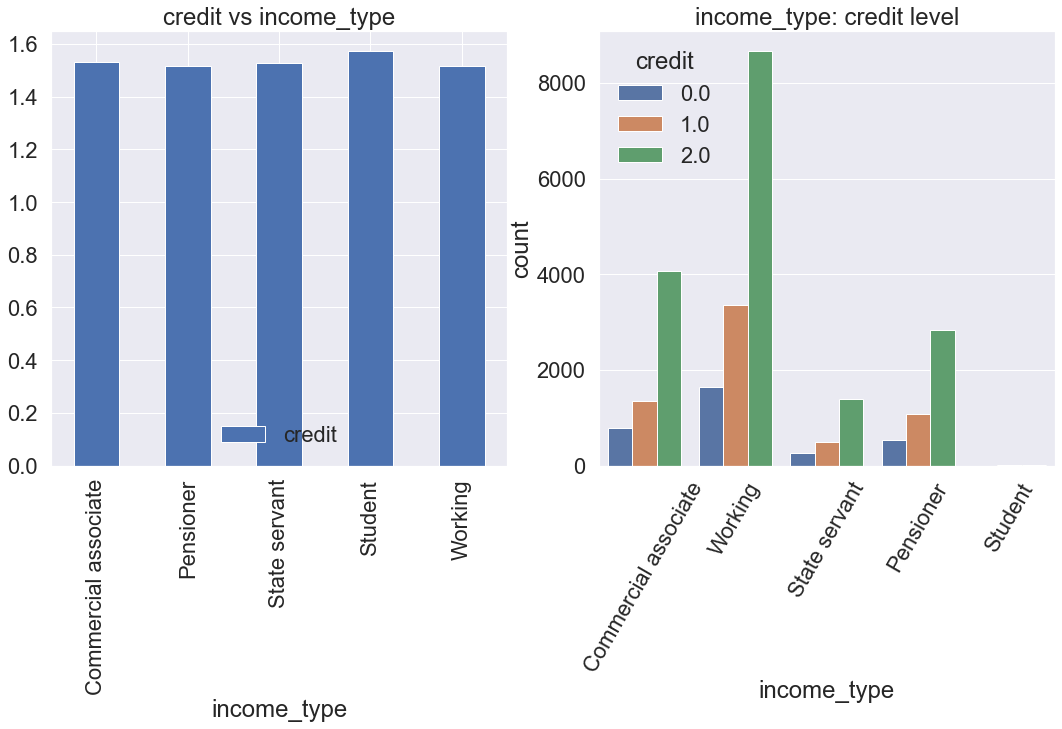

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 소득 분류에 따른 평균 신용등급
data[['income_type', 'credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')

# 소득 분류에 따른 신용등급별 사람 수
sns.countplot('income_type', hue='credit', data=data, ax=ax[1])
ax[1].set_title('income_type: credit level')
plt.xticks(rotation=60)

plt.show()

* 여기서도 큰차이 없는듯..
* Student의 경우 카드 만드는 경우가 적어 분포의 차이를 반영하는 것에 의문이 있음

In [25]:
pd.crosstab(data.credit, data.income_type, margins=True).style.background_gradient(cmap='summer_r')

income_type,Commercial associate,Pensioner,State servant,Student,Working,All
credit,,,,,,
0.0,782,536,265,0,1639,3222
1.0,1344,1084,489,3,3347,6267
2.0,4076,2829,1400,4,8659,16968
All,6202,4449,2154,7,13645,26457


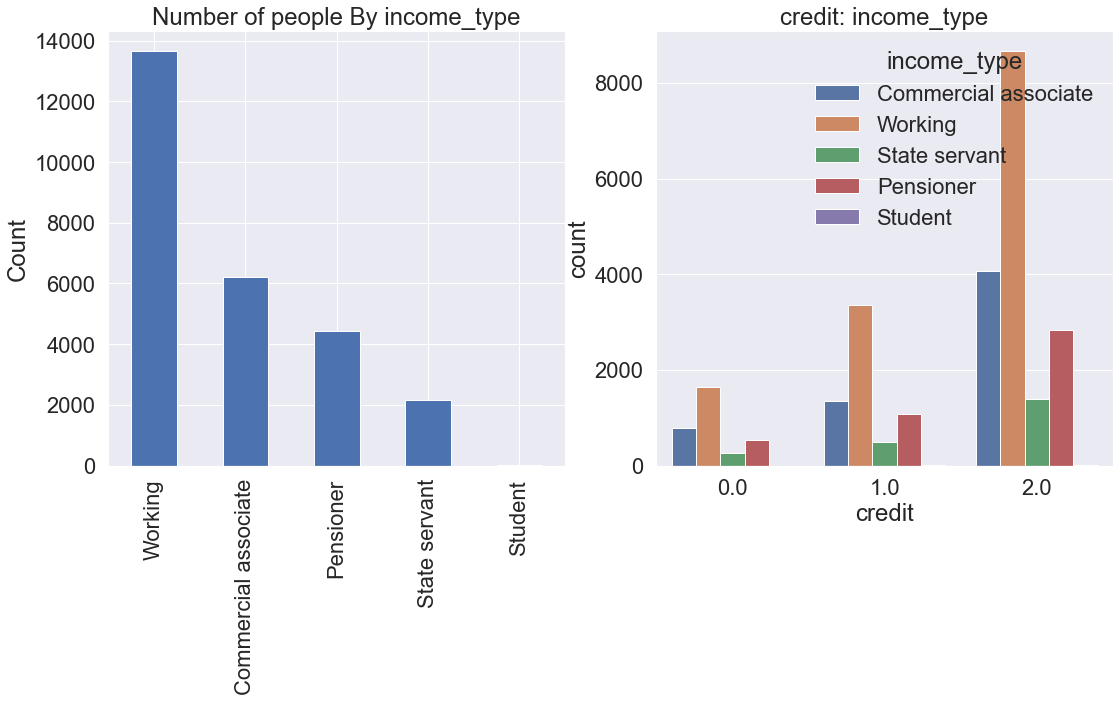

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 소들 분류별 사람 수
data['income_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By income_type')
ax[0].set_ylabel('Count')

# 신용등급별 소득 분류 사람 수
sns.countplot('credit', hue='income_type', data=data, ax=ax[1])
ax[1].set_title('credit: income_type')
plt.show()

---
#### Q6. 직업에 따라 신용도가 달라질까?
결론 : 있는듯?

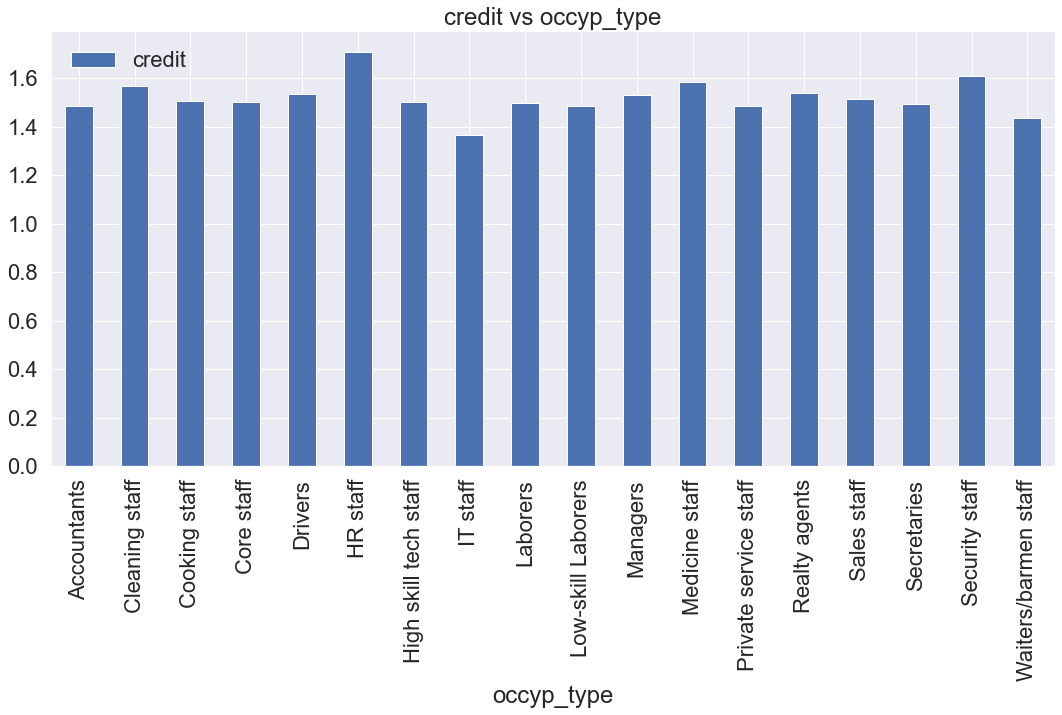

In [29]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))

# 직업에 따른 평균 신용등급
data[['occyp_type', 'credit']].groupby(['occyp_type']).mean().plot.bar(ax=ax)
plt.title('credit vs occyp_type')

plt.show()

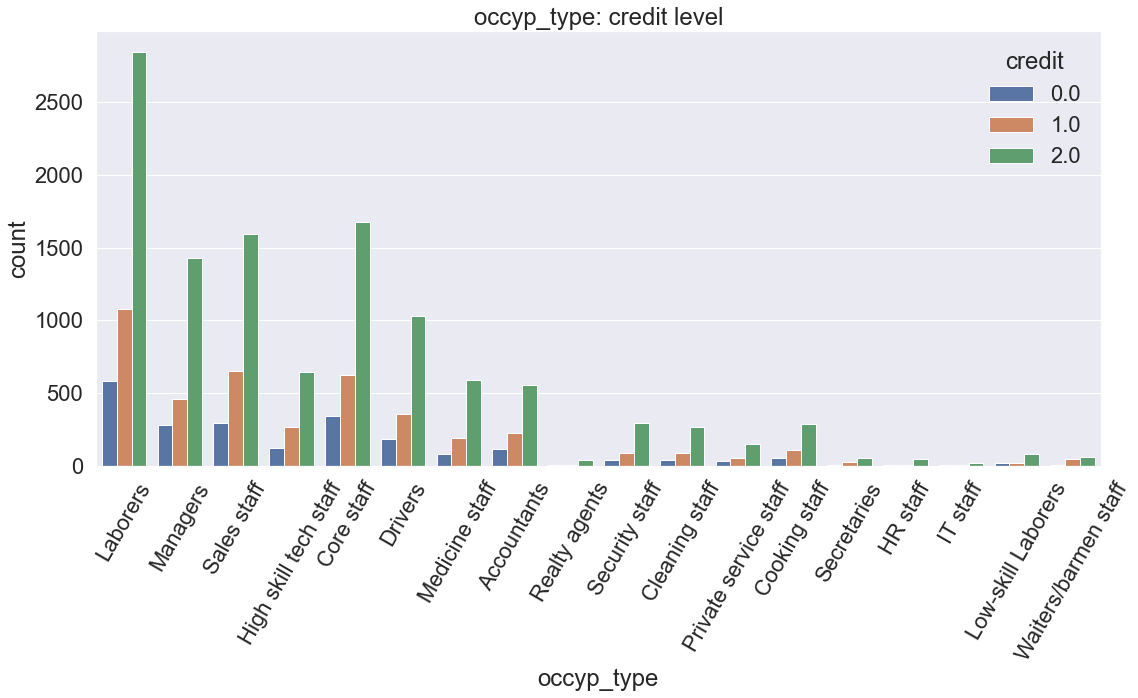

In [31]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))

# 직업에 따른 신용등급별 사람 수
sns.countplot('occyp_type', hue='credit', data=data, ax=ax)
plt.title('occyp_type: credit level')
plt.xticks(rotation=60)

plt.show()

---
#### Q7. 교육 수준에 따른 신용도
결론 : X

In [32]:
pd.crosstab(data.edu_type, data.credit, margins=True).style.background_gradient(cmap='summer_r')

credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,2,7,14,23
Higher education,909,1751,4502,7162
Incomplete higher,114,246,660,1020
Lower secondary,28,59,170,257
Secondary / secondary special,2169,4204,11622,17995
All,3222,6267,16968,26457


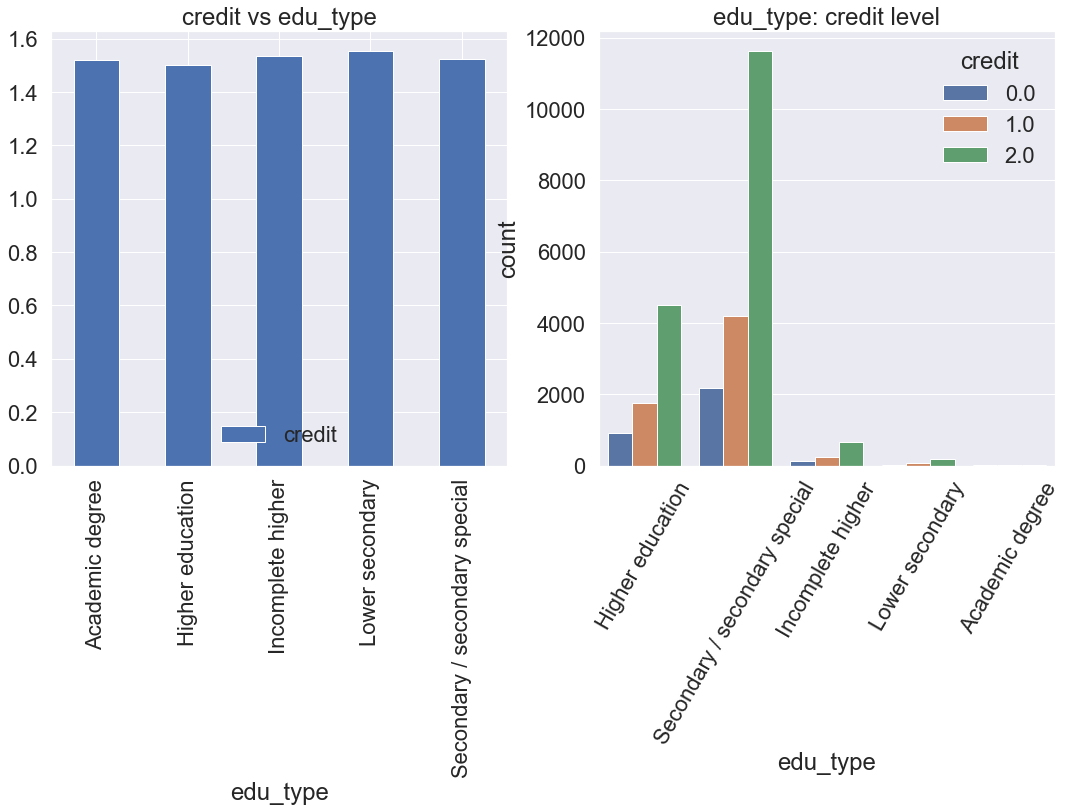

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 교육 수준별 평균 신용도
data[['edu_type', 'credit']].groupby(['edu_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs edu_type')

# 교육 수준에 따른 신용등급별 사람 수
sns.countplot('edu_type', hue='credit', data=data, ax=ax[1])
ax[1].set_title('edu_type: credit level')
plt.xticks(rotation=60)

plt.show()

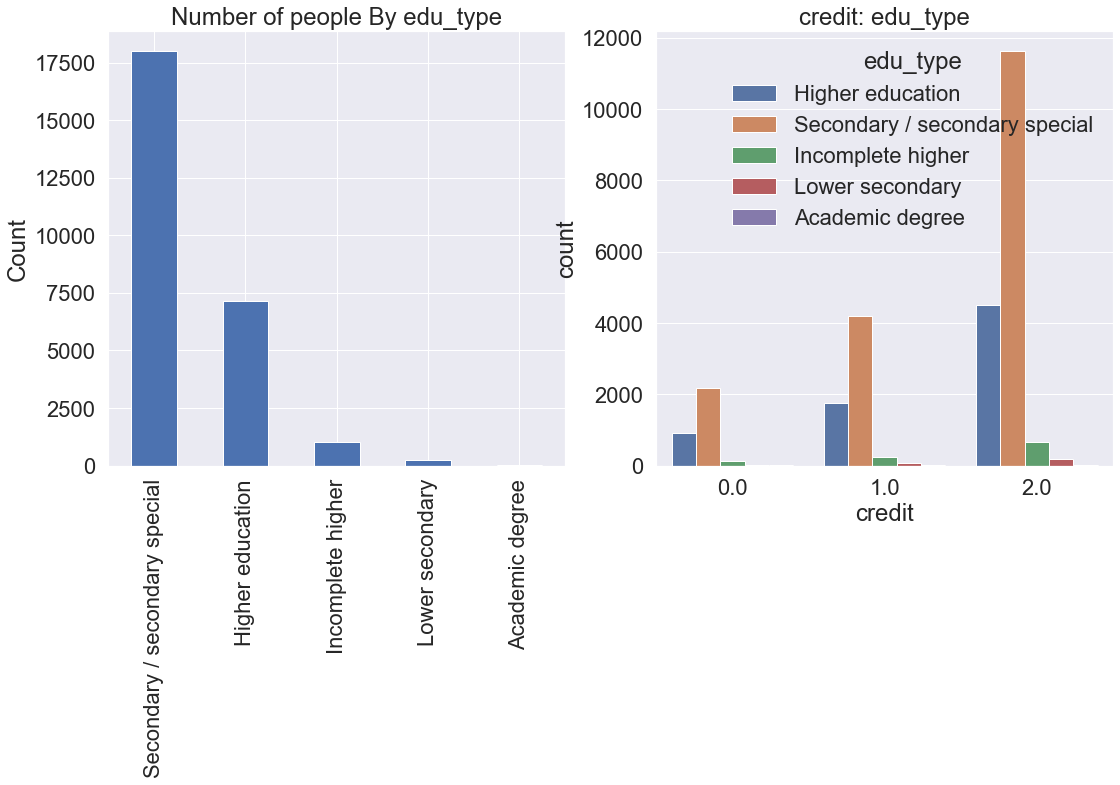

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 교육 수준별 사람 수
data['edu_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By edu_type')
ax[0].set_ylabel('Count')

# 신용등급에 따른 교육 수준별 사람 수
sns.countplot('credit', hue='edu_type', data=data, ax=ax[1])
ax[1].set_title('credit: edu_type')
plt.show()

---
#### Q8. 핸드폰 소유 여부에 따른 신용도
결론 : 핸드폰을 모두 가지고 있음

In [37]:
data.groupby(['FLAG_MOBIL'])['credit'].count()

FLAG_MOBIL
1    26457
Name: credit, dtype: int64

In [38]:
data.groupby(['FLAG_MOBIL', 'credit'])['credit'].count()

FLAG_MOBIL  credit
1           0.0        3222
            1.0        6267
            2.0       16968
Name: credit, dtype: int64

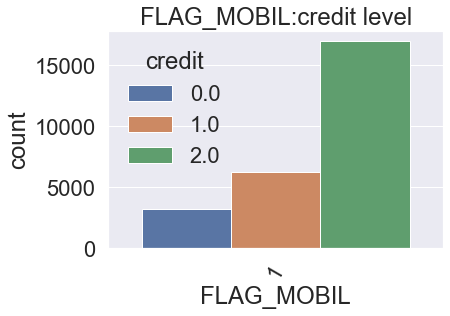

In [39]:
# 신용등급 분포
sns.countplot('FLAG_MOBIL',hue='credit',data=data)
plt.title('FLAG_MOBIL:credit level')
plt.xticks(rotation=60)
plt.show()

In [40]:
pd.crosstab(data.credit,data.FLAG_MOBIL,margins=True).style.background_gradient(cmap='summer_r')

FLAG_MOBIL,1,All
credit,,
0.0,3222,3222
1.0,6267,6267
2.0,16968,16968
All,26457,26457


---
#### Q9. 업무용 전화 소유 여부에 따른 신용도


In [41]:
data.groupby(['work_phone'])['credit'].count()

work_phone
0    20511
1     5946
Name: credit, dtype: int64

In [42]:
data.groupby(['work_phone', 'credit'])['credit'].count()

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64

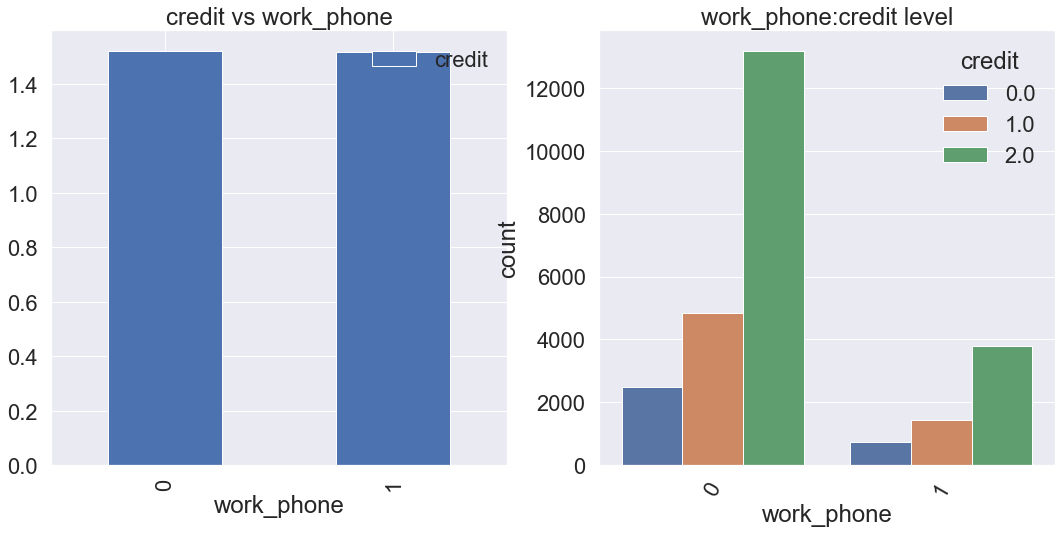

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 업무용 전화 소유 여부에 따른 평균 신용도
data[['work_phone','credit']].groupby(['work_phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs work_phone')

# 업무용 전화 소유 여부에 따른 신용도 분포
sns.countplot('work_phone',hue='credit',data=data,ax=ax[1])
ax[1].set_title('work_phone:credit level')
plt.xticks(rotation=60)

plt.show()

In [44]:
pd.crosstab(data.credit,data.work_phone,margins=True).style.background_gradient(cmap='summer_r')

work_phone,0,1,All
credit,,,
0.0,2493,729,3222
1.0,4844,1423,6267
2.0,13174,3794,16968
All,20511,5946,26457


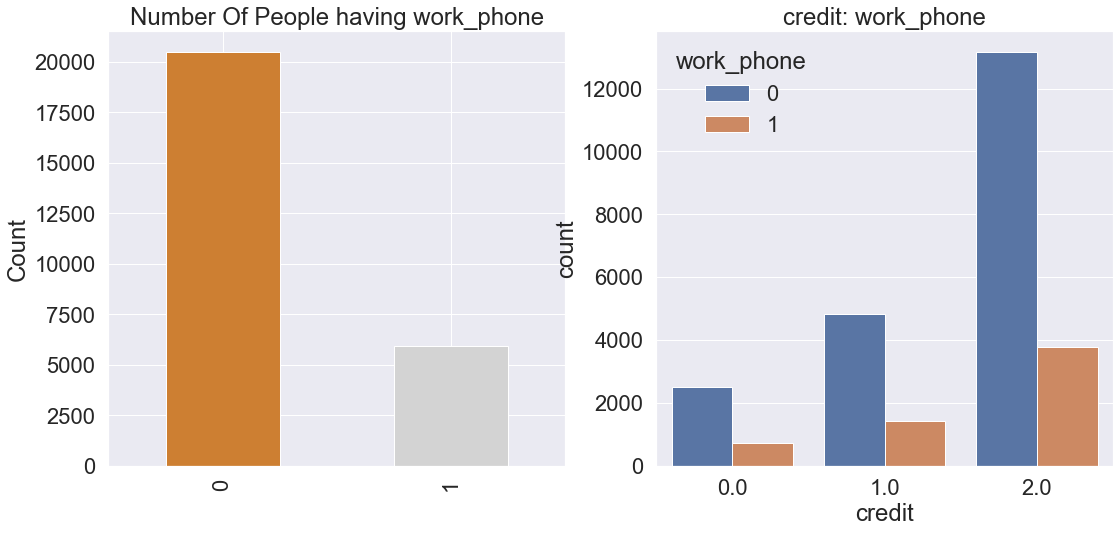

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 업무용 전화 소유 여부별 사람 수
data['work_phone'].value_counts().plot.bar(color=['#CD7F32','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People having work_phone')
ax[0].set_ylabel('Count')

# 신용도에 따른 업무용 소유 여부별 사람 수
sns.countplot('credit',hue='work_phone',data=data,ax=ax[1])
ax[1].set_title('credit: work_phone')

plt.show()


---
#### Q10. 전화 소유 여부에 따른 신용도

In [47]:
data.groupby(['phone'])['credit'].count()

phone
0    18672
1     7785
Name: credit, dtype: int64

In [48]:
data.groupby(['phone', 'credit'])['credit'].count()

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64

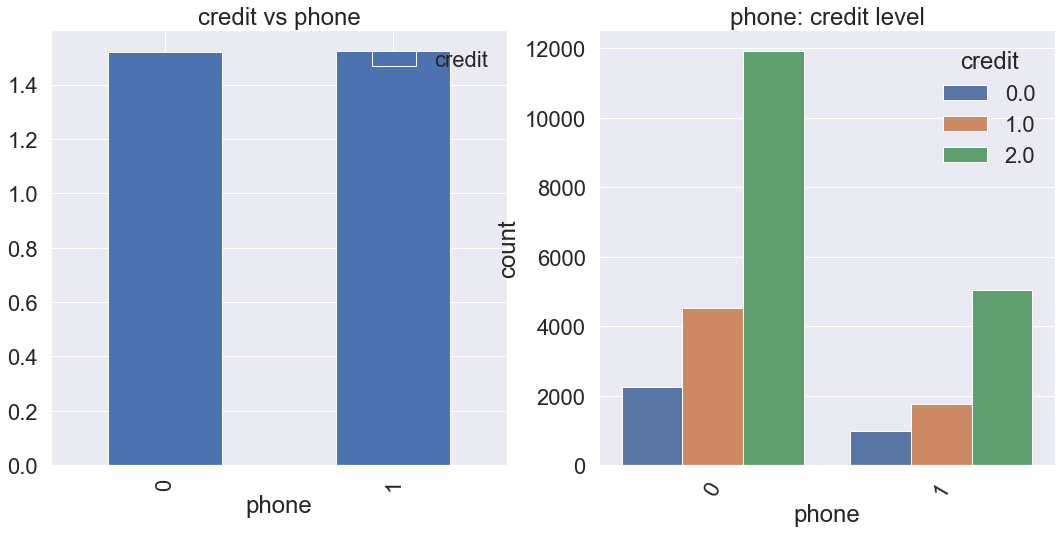

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 전화 소유 여부에 따른 평균 신용도
data[['phone','credit']].groupby(['phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs phone')

# 전화 소유 여부에 따른 신용도 분포
sns.countplot('phone',hue='credit',data=data,ax=ax[1])
ax[1].set_title('phone: credit level')
plt.xticks(rotation=60)

plt.show()

In [51]:
pd.crosstab(data.credit,data.phone,margins=True).style.background_gradient(cmap='summer_r')

phone,0,1,All
credit,,,
0.0,2245,977,3222
1.0,4510,1757,6267
2.0,11917,5051,16968
All,18672,7785,26457


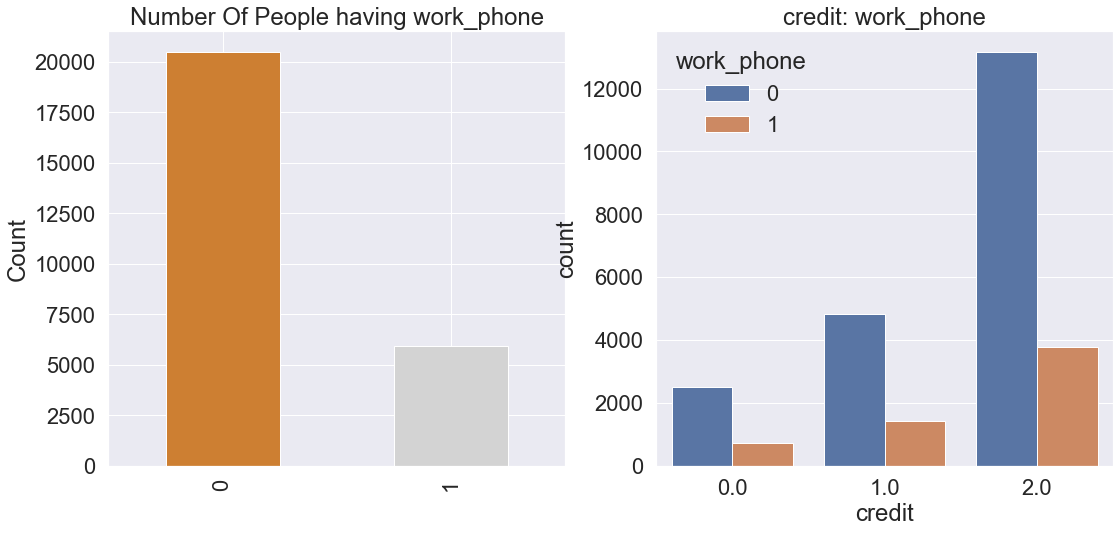

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 전화 소유 여부별 사람 수
data['work_phone'].value_counts().plot.bar(color=['#CD7F32','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People having work_phone')
ax[0].set_ylabel('Count')

# 신용도에 따른 전화 소유 여부별 사람 수
sns.countplot('credit',hue='work_phone',data=data,ax=ax[1])
ax[1].set_title('credit: work_phone')

plt.show()

---
#### Q11. 이메일 소유 여부에 따른 신용도

In [55]:
data.groupby(['email'])['credit'].count()

email
0    24042
1     2415
Name: credit, dtype: int64

In [56]:
data.groupby(['email', 'credit'])['credit'].count()

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64

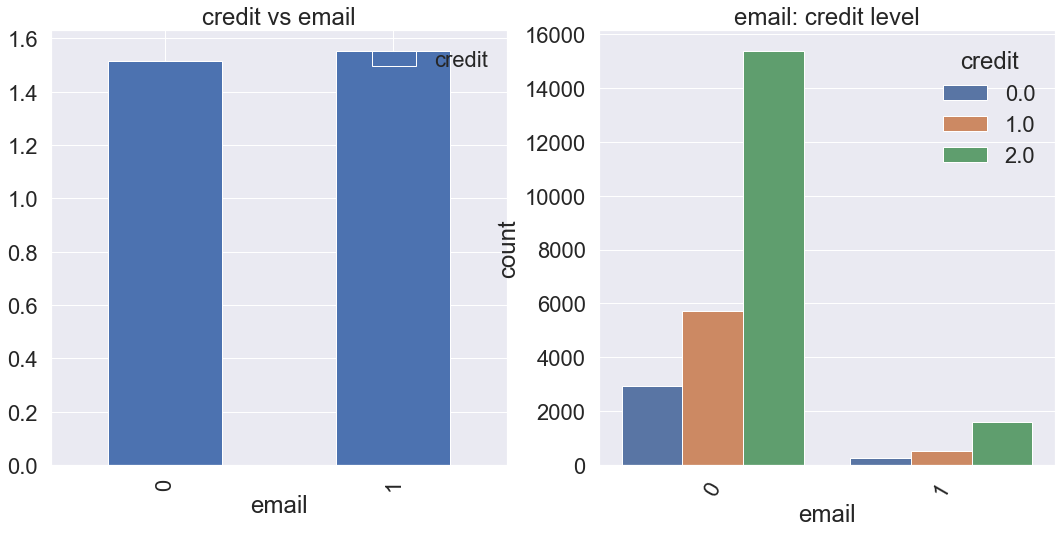

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 이메일 소유 여부에 따른 평균 신용도
data[['email','credit']].groupby(['email']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs email')

# 이메일 소유 여부에 따른 신용도 분포
sns.countplot('email',hue='credit',data=data,ax=ax[1])
ax[1].set_title('email: credit level')
plt.xticks(rotation=60)

plt.show()

In [59]:
pd.crosstab(data.credit,data.email,margins=True).style.background_gradient(cmap='summer_r')

email,0,1,All
credit,,,
0.0,2953,269,3222
1.0,5724,543,6267
2.0,15365,1603,16968
All,24042,2415,26457


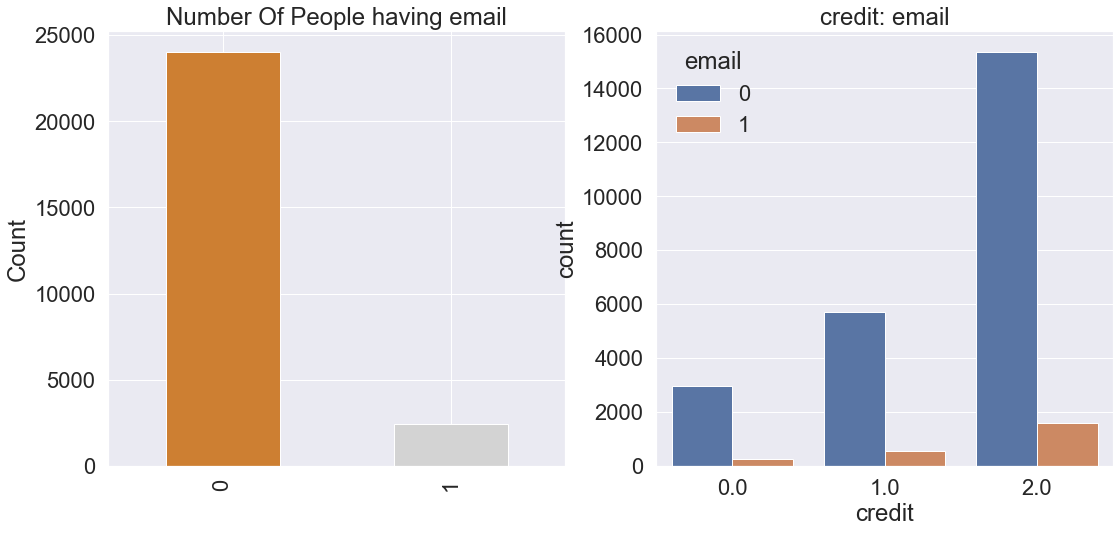

In [60]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 이메일 소유 여부별 사람 수
data['email'].value_counts().plot.bar(color=['#CD7F32','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People having email')
ax[0].set_ylabel('Count')

# 신용도에 따른 이메일 소유 여부별 사람 수
sns.countplot('credit',hue='email',data=data,ax=ax[1])
ax[1].set_title('credit: email')

plt.show()

---
#### Q12. 가족 규모에 따른 신용도

In [63]:
data.groupby(['family_size'])['credit'].count()

family_size
1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: credit, dtype: int64

In [64]:
data.groupby(['family_size', 'credit'])['credit'].count()

family_size  credit
1.0          0.0        605
             1.0       1318
             2.0       3186
2.0          0.0       1720
             1.0       3249
             2.0       9137
3.0          0.0        610
             1.0       1088
             2.0       2934
4.0          0.0        251
             1.0        520
             2.0       1489
5.0          0.0         27
             1.0         74
             2.0        190
6.0          0.0          7
             1.0         12
             2.0         25
7.0          0.0          2
             1.0          6
             2.0          1
9.0          2.0          2
15.0         2.0          3
20.0         2.0          1
Name: credit, dtype: int64

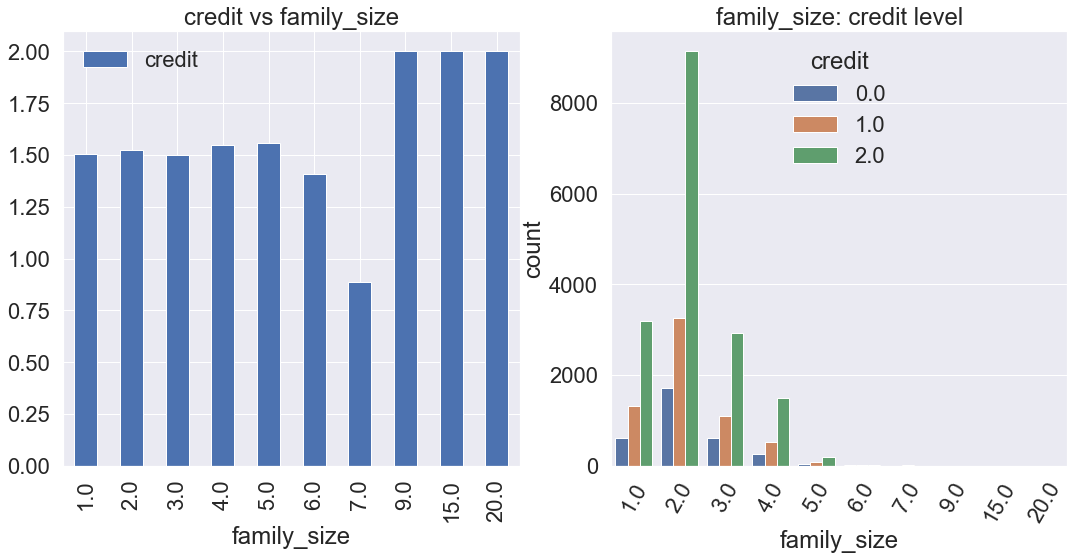

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 가족 규모에 따른 평균 신용도
data[['family_size','credit']].groupby(['family_size']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_size')

# 가족 규모에 따른 신용도 분포
sns.countplot('family_size',hue='credit',data=data,ax=ax[1])
ax[1].set_title('family_size: credit level')
plt.xticks(rotation=60)

plt.show()

In [66]:
pd.crosstab(data.credit,data.family_size,margins=True).style.background_gradient(cmap='summer_r')

family_size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,15.0,20.0,All
credit,,,,,,,,,,,
0.0,605,1720,610,251,27,7,2,0,0,0,3222
1.0,1318,3249,1088,520,74,12,6,0,0,0,6267
2.0,3186,9137,2934,1489,190,25,1,2,3,1,16968
All,5109,14106,4632,2260,291,44,9,2,3,1,26457


* 7인 가구의수가 적어서 처리에 대한 고민을 해봐야 할 듯!!

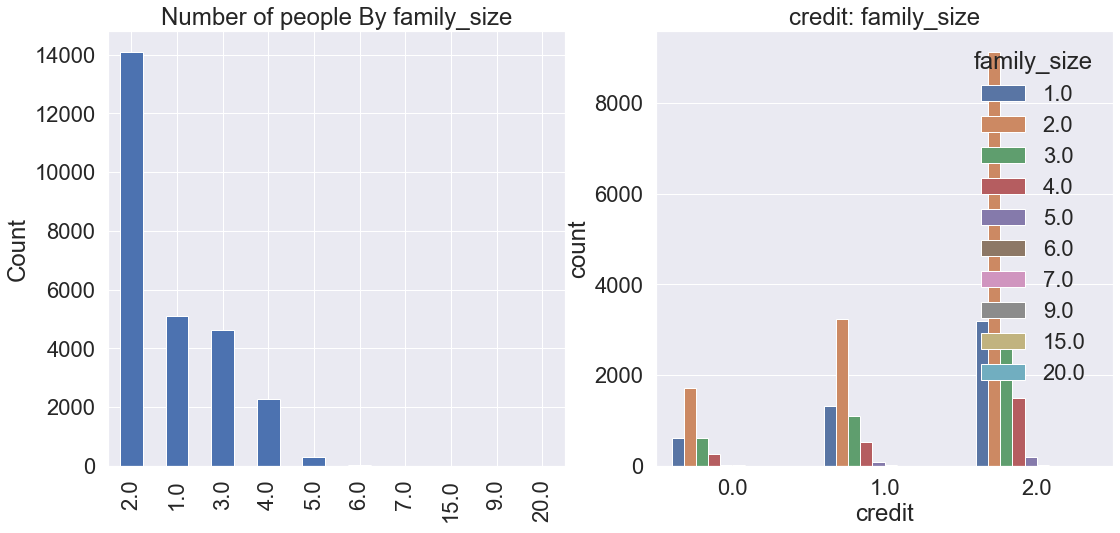

In [67]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가족 규모별 사람 수
data['family_size'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By family_size')
ax[0].set_ylabel('Count')

# 신용등급에 따른 가족 규모별 사람 수
sns.countplot('credit', hue='family_size', data=data, ax=ax[1])
ax[1].set_title('credit: family_size')
plt.show()

---
#### Q13. 아이 숫자에 따른 신용도

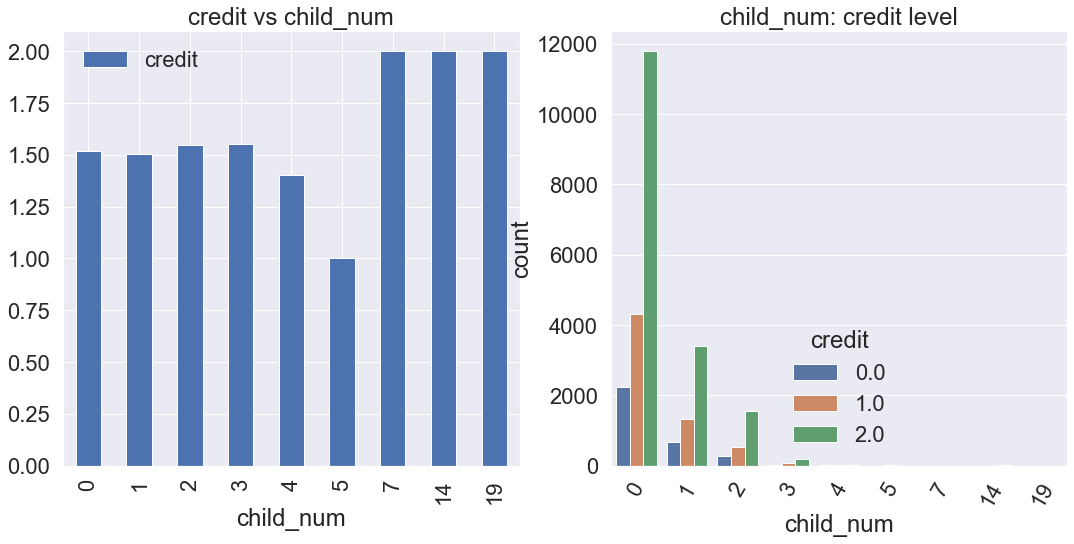

In [70]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 아이 숫자에 따른 평균 신용도
data[['child_num','credit']].groupby(['child_num']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs child_num')

# 아이 숫자에 따른 신용도 분포
sns.countplot('child_num',hue='credit',data=data,ax=ax[1])
ax[1].set_title('child_num: credit level')
plt.xticks(rotation=60)

plt.show()

In [71]:
pd.crosstab(data.credit,data.child_num,margins=True).style.background_gradient(cmap='summer_r')

child_num,0,1,2,3,4,5,7,14,19,All
credit,,,,,,,,,,
0.0,2233,682,268,29,8,2,0,0,0,3222
1.0,4322,1313,535,79,12,6,0,0,0,6267
2.0,11785,3391,1559,198,27,2,2,3,1,16968
All,18340,5386,2362,306,47,10,2,3,1,26457


* 가구원 수와 비교했을 때 일정 숫자를 뺀 분포와 비슷한 양상을 보인다
* 하지만 숫자가 낮은 경우 가족 구성에 대한 고려를 섞어서 해봐야 할 듯!

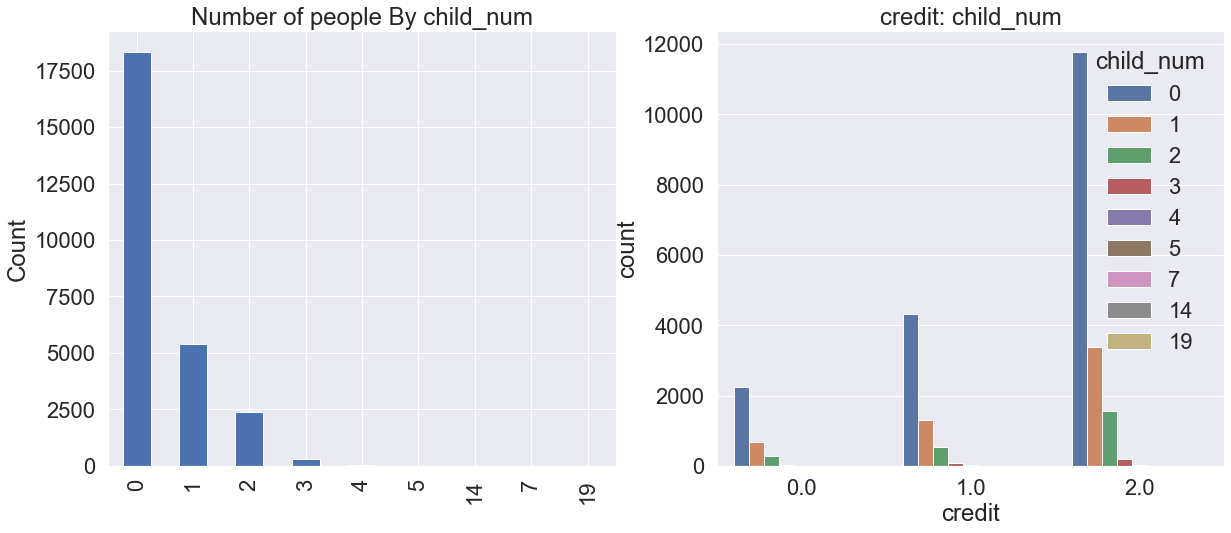

In [74]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# 아이 숫자별 사람 수
data['child_num'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By child_num')
ax[0].set_ylabel('Count')

# 신용등급에 따른 아이 숫자별 사람 수
sns.countplot('credit', hue='child_num', data=data, ax=ax[1])
ax[1].set_title('credit: child_num')
plt.show()

---
## 6. 총소득, 나이, 직장 경력에 따른 신용도
* 이부분 잘 모르겠음...

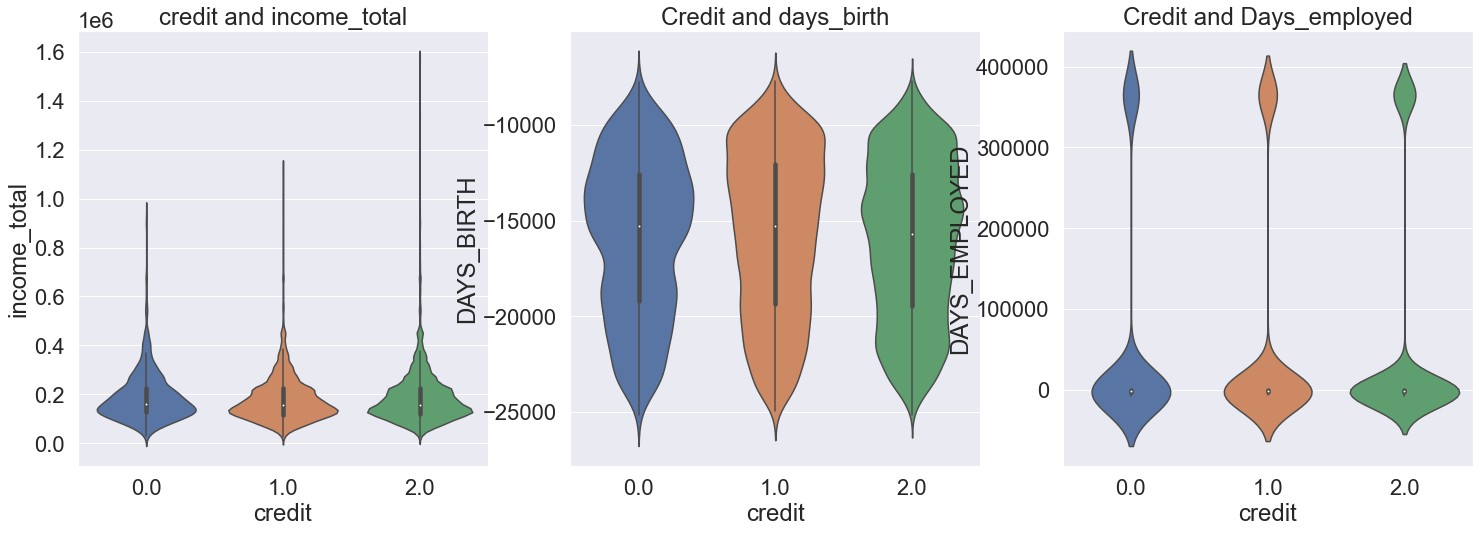

In [75]:
f,ax=plt.subplots(1,3,figsize=(25,8))

sns.violinplot("credit","income_total", data=data,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))

sns.violinplot("credit","DAYS_BIRTH",  data=data,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))

sns.violinplot("credit","DAYS_EMPLOYED", data=data,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))

plt.show()

In [4]:
data[data['DAYS_EMPLOYED']>=0] 

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [5]:
data.loc[(data.DAYS_EMPLOYED)>=0,'DAYS_EMPLOYED'] = 0

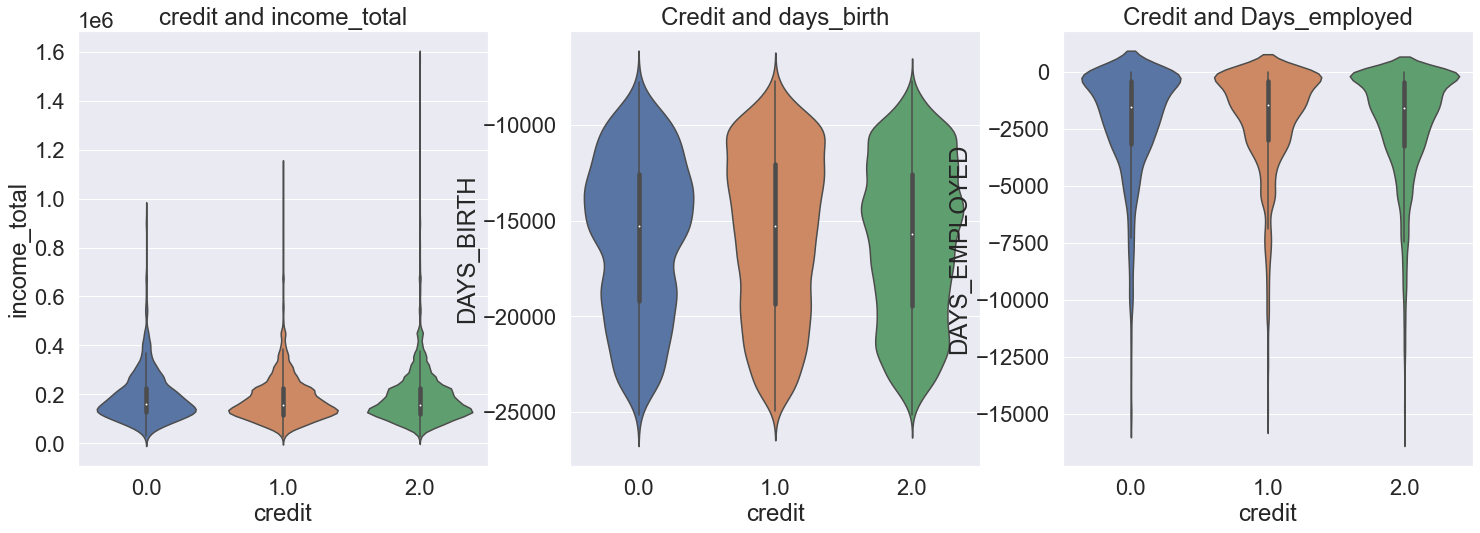

In [6]:
f,ax=plt.subplots(1,3,figsize=(25,8))
sns.violinplot("credit","income_total", data=data,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_BIRTH",  data=data,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_EMPLOYED", data=data,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))
plt.show()